<a href="https://colab.research.google.com/github/jackson119/new_cifar_10/blob/main/new__cifar10_3(0.75).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

In [1]:
from tensorflow.keras.datasets import cifar10
import numpy as np
np.random.seed(10)

In [2]:
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
print("train data:","images:",x_img_train.shape,"labels:",y_label_train.shape)
print("test data:","images:",x_img_test.shape,"labels:",y_label_test.shape)

train data: images: (50000, 32, 32, 3) labels: (50000, 1)
test data: images: (10000, 32, 32, 3) labels: (10000, 1)


# standardize and perform one hot encoding

In [4]:
x_img_train_normalize=x_img_train.astype('float32')/255.0
x_img_test_normalize=x_img_test.astype('float32')/255.0

In [5]:
from tensorflow.keras import utils

In [6]:
y_label_train_OneHot=utils.to_categorical(y_label_train)
y_label_test_OneHot=utils.to_categorical(y_label_test)

# Images and label

In [7]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [8]:
# Construct model
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D

In [9]:
model=Sequential()

In [10]:
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(Dropout(0.75))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [11]:
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Dropout(0.75))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Dropout(0.75))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [13]:
### neural network
model.add(Flatten())
model.add(Dropout(0.75))
### hidden layer 1
model.add(Dense(2500,activation='relu'))
model.add(Dropout(0.75))
### hidden layer 2
model.add(Dense(1500,activation='relu'))
model.add(Dropout(0.75))
### output layer
model.add(Dense(10,activation='softmax'))

In [14]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        3

In [15]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history=model.fit(x_img_train_normalize,y_label_train_OneHot,validation_split=0.2,epochs=50,batch_size=300,verbose=2)

Epoch 1/50
134/134 - 39s - loss: 2.3033 - accuracy: 0.1383 - val_loss: 2.4380 - val_accuracy: 0.0980
Epoch 2/50
134/134 - 5s - loss: 2.0384 - accuracy: 0.2289 - val_loss: 3.3020 - val_accuracy: 0.0980
Epoch 3/50
134/134 - 5s - loss: 1.9358 - accuracy: 0.2627 - val_loss: 3.7287 - val_accuracy: 0.0997
Epoch 4/50
134/134 - 5s - loss: 1.8574 - accuracy: 0.2901 - val_loss: 3.9348 - val_accuracy: 0.0997
Epoch 5/50
134/134 - 5s - loss: 1.7903 - accuracy: 0.3150 - val_loss: 4.2062 - val_accuracy: 0.0998
Epoch 6/50
134/134 - 5s - loss: 1.7355 - accuracy: 0.3377 - val_loss: 4.4859 - val_accuracy: 0.1079
Epoch 7/50
134/134 - 5s - loss: 1.6947 - accuracy: 0.3575 - val_loss: 4.3589 - val_accuracy: 0.1253
Epoch 8/50
134/134 - 5s - loss: 1.6558 - accuracy: 0.3774 - val_loss: 4.3850 - val_accuracy: 0.1258
Epoch 9/50
134/134 - 5s - loss: 1.6347 - accuracy: 0.3828 - val_loss: 4.5251 - val_accuracy: 0.1327
Epoch 10/50
134/134 - 5s - loss: 1.6162 - accuracy: 0.3948 - val_loss: 4.3633 - val_accuracy: 0.101

In [16]:
from matplotlib import pyplot as plt
def show_train_history(train_history,train,validation):
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train History')
  plt.ylabel('train')
  plt.xlabel('Epoch')
  plt.legend(['train','validation'],loc='upper left')
  plt.show()

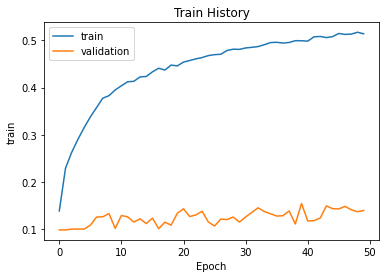

In [17]:
show_train_history(train_history,'accuracy','val_accuracy')

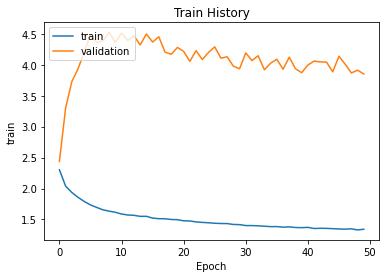

In [18]:
show_train_history(train_history,'loss','val_loss')

In [19]:
### estimate model accuracy

In [20]:
scores=model.evaluate(x_img_test_normalize,y_label_test_OneHot,verbose=0)

In [21]:
print(f'Test loss: {scores[0]} / Test accuracy: {scores[1]}')

Test loss: 3.834059715270996 / Test accuracy: 0.14180000126361847


In [22]:
prediction=model.predict_classes(x_img_test_normalize) ### prediction

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [23]:
prediction

array([6, 6, 6, ..., 6, 4, 4])

In [24]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
  fig=plt.gcf()
  fig.set_size_inches(12,14)
  if num>25:num=25
  for i in range(0,num):
    ax=plt.subplot(5,5,1+i)
    ax.imshow(images[idx],cmap='binary')
    title=str(i) +',' +label_dict[labels[i][0]]
    if len(prediction)>0:
      title+='=>'+label_dict[prediction[i]]
    ax.set_title(title,fontsize=10)
    ax.set_xticks([]);ax.set_yticks([])
    idx+=1
  plt.show()

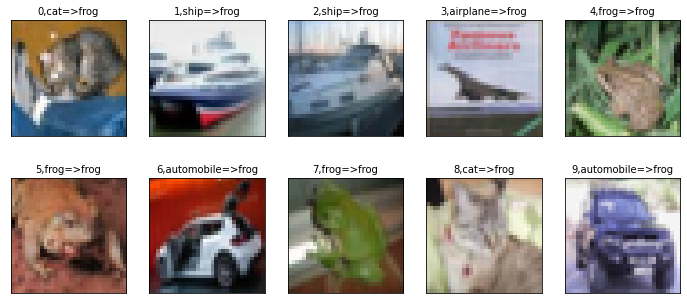

In [25]:
plot_images_labels_prediction(x_img_test,y_label_test,prediction,0,10)

In [26]:
# check for prediction rate
predicted_Probability=model.predict(x_img_test_normalize)

In [27]:
def show_predicted_probability(y,prediction,x_img,predicted_Probability,i):
  print('label:',label_dict[y[i][0]],
        'predict',label_dict[prediction[i]])
  plt.figure(figsize=(2,2))
  plt.imshow(np.reshape(x_img_test[i],(32,32,3)))
  plt.show()
  for j in range(10):
    print(label_dict[j]+ ' probability:%1.9f'%(predicted_Probability[i][j]))


label: cat predict frog


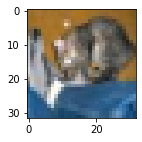

airplane probability:0.004547925
automobile probability:0.001342190
bird probability:0.094920762
cat probability:0.157456696
deer probability:0.235212952
dog probability:0.078660227
frog probability:0.405060172
horse probability:0.021024542
ship probability:0.000630574
truck probability:0.001143929


In [28]:
show_predicted_probability(y_label_test,prediction,x_img_test,predicted_Probability,0)

#Confusion matrix

In [29]:
import pandas as pd

In [30]:
pd.crosstab(y_label_test.reshape(-1),prediction,rownames=['label'],colnames=['predict'])

predict,2,4,6
label,,,
0,0,355,645
1,0,27,973
2,0,422,578
3,0,124,876
4,0,517,483
5,0,185,815
6,0,99,901
7,0,427,573
8,6,165,829
